In [1]:
!pip install WordCloud
!pip install nltk

In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,accuracy_score

%matplotlib inline
import numpy as np

import pandas as pd
import nltk

In [23]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [24]:
print(train.shape, test.shape)


(20800, 5) (5200, 4)


In [25]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())
print(train.head(5))

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been se

In [26]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [27]:
print(train[train['label']==1].total) # Sonucun 1 olan kısmı

0        House Dem Aide: We Didn’t Even See Comey’s Let...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
6        Life: Life Of Luxury: Elton John’s 6 Favorite ...
                               ...                        
20788    Maine’s Gov. LePage Threatens To ‘Investigate’...
20791    Lawyer Who Kept Hillary Campaign Chief Out of ...
20793    Idiot Who Destroyed Trump Hollywood Star Gets ...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive David Swanson  David...
Name: total, Length: 10413, dtype: object


In [28]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [29]:
for val in train[train['label']==0].total: 
      
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

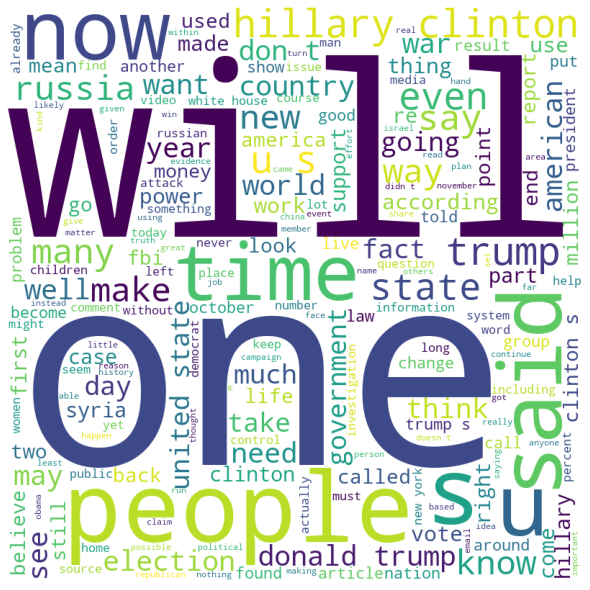

In [30]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

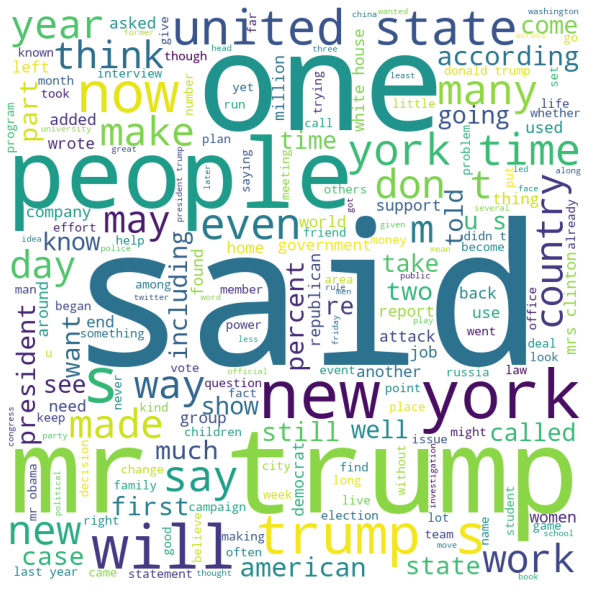

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [32]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords

In [33]:
stop_words = nltk.corpus.stopwords.words('english')


In [34]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
X_train = train['total']
Y_train = train['label']

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, random_state=0)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [38]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

## LOGİSTİC REGRESSİON

In [39]:
#Count Vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_count= LogisticRegression(solver="liblinear",max_iter=500)
logistic_regression_count.fit(count_train,y_train)
predictions_lr=logistic_regression_count.predict(count_test)
accuracy_rf = accuracy_score(y_test, predictions_lr)
print("Logistic Regression Accuracy Count Vectorizer: %.2f%%" % (accuracy_rf * 100.0))

Logistic Regression Accuracy Count Vectorizer: 97.48%


[[2488   76]
 [  55 2581]]


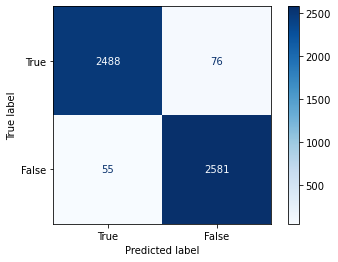

Sensivity
0.9703588143525741
Accuracy
0.9748076923076923
Specificity
0.9791350531107739
Recall
0.9703588143525741
Precision
0.9783720015729453


In [40]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import numpy as np
cm=confusion_matrix(y_test,predictions_lr)
print(cm)
class_names = ['True', 'False']

np.set_printoptions(precision=2)


isp = plot_confusion_matrix(logistic_regression_count, count_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

In [41]:
#Tfidf Vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression= LogisticRegression(solver="liblinear",max_iter=500)
logistic_regression.fit(tfidf_train,y_train)
predictions_lr=logistic_regression.predict(tfidf_test)
accuracy_rf = accuracy_score(y_test, predictions_lr)
print("Logistic Regression Accuracy Tfidf: %.2f%%" % (accuracy_rf * 100.0))

Logistic Regression Accuracy Tfidf: 95.62%


[[2485   79]
 [ 149 2487]]


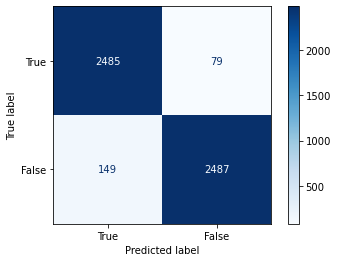

Sensivity
0.969188767550702
Accuracy
0.9561538461538461
Specificity
0.9434749620637329
Recall
0.969188767550702
Precision
0.9434320425208808


In [43]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import numpy as np
cm=confusion_matrix(y_test,predictions_lr)
print(cm)
class_names = ['True', 'False']

np.set_printoptions(precision=2)


isp = plot_confusion_matrix(logistic_regression, tfidf_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

## DECİSİON TREE

Desicion Tree Accuracy Count Vectorizer: 96.67%


NameError: name 'disp' is not defined

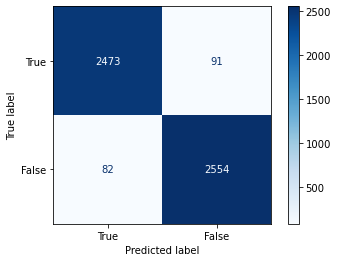

In [44]:
#Count Vectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier() #chart la yapıldı ,entropy olsaydı ıd3 ileydi
dt.fit(count_train, y_train)

y_pred_count = dt.predict(count_test)
accuracy_rf = accuracy_score(y_test, y_pred_count)
print("Desicion Tree Accuracy Count Vectorizer: %.2f%%" % (accuracy_rf * 100.0))



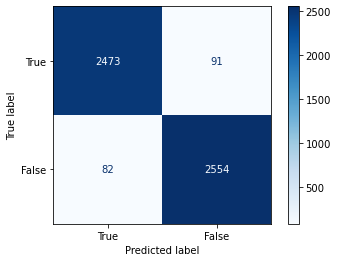

[[2473   91]
 [  82 2554]]
Sensivity
0.9645085803432137
Accuracy
0.9667307692307693
Specificity
0.9688922610015175
Recall
0.9645085803432137
Precision
0.9679060665362035


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

isp = plot_confusion_matrix(dt, count_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
cm=confusion_matrix(y_test,y_pred_count)
print(cm)
#Accuracy, Sensitivity, Specificity, Recall, Precision
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

Desicion Tree Accuracy Tfidf: 95.40%


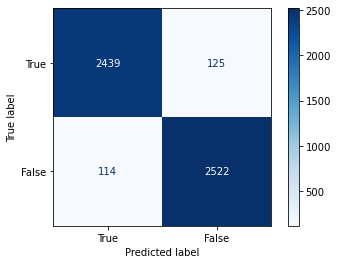

[[2439  125]
 [ 114 2522]]
Sensivity
0.9512480499219969
Accuracy
0.9540384615384615
Specificity
0.956752655538695
Recall
0.9512480499219969
Precision
0.9553466509988249


In [48]:
#Tfidf Vectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy') #chart la yapıldı ,entropy olsaydı ıd3 ileydi
dt.fit(tfidf_train, y_train)

y_pred_dt_tfidf = dt.predict(tfidf_test)
accuracy_rf = accuracy_score(y_test, y_pred_dt_tfidf)
print("Desicion Tree Accuracy Tfidf: %.2f%%" % (accuracy_rf * 100.0))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

isp = plot_confusion_matrix(dt, tfidf_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
cm=confusion_matrix(y_test,y_pred_dt_tfidf)
print(cm)
#Accuracy, Sensitivity, Specificity, Recall, Precision
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

# NAİVE BAYES

0.9328846153846154
[[2545   19]
 [ 330 2306]]


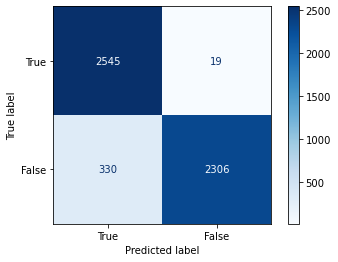

Sensivity
0.9925897035881436
Accuracy
0.9328846153846154
Specificity
0.8748103186646434
Recall
0.9925897035881436
Precision
0.8852173913043478


In [49]:

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import numpy as np
cm=confusion_matrix(y_test,pred_nb_count)
print(cm)
class_names = ['True', 'False']

np.set_printoptions(precision=2)


isp = plot_confusion_matrix(nb_classifier, count_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

0.9090384615384616
[[2557    7]
 [ 466 2170]]


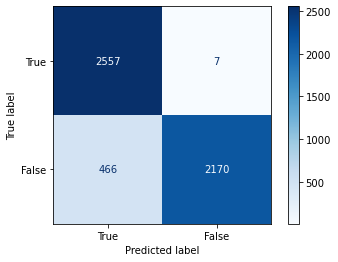

Sensivity
0.9972698907956318
Accuracy
0.9090384615384616
Specificity
0.8232169954476479
Recall
0.9972698907956318
Precision
0.845848494872643


In [50]:

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_count)
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import numpy as np
cm=confusion_matrix(y_test,pred_nb_tfidf)
print(cm)
class_names = ['True', 'False']

np.set_printoptions(precision=2)


isp = plot_confusion_matrix(nb_classifier, tfidf_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

# RANDOM FOREST

0.8075


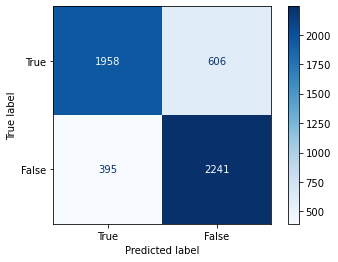

[[2473   91]
 [  82 2554]]
Sensivity
0.9645085803432137
Accuracy
0.9667307692307693
Specificity
0.9688922610015175
Recall
0.9645085803432137
Precision
0.9679060665362035


In [53]:
#Count Vectorizer
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(count_train, y_train)

y_pred_rf_count=rf.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, y_pred_rf_count)
print(acc_nb_count)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

isp = plot_confusion_matrix(rf, count_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
cm=confusion_matrix(y_test,y_pred_count)
print(cm)
#Accuracy, Sensitivity, Specificity, Recall, Precision
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))

0.8


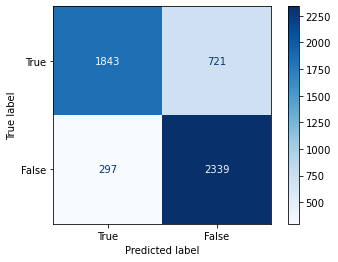

[[1885  679]
 [ 361 2275]]
Sensivity
0.735179407176287
Accuracy
0.8
Specificity
0.8630500758725341
Recall
0.735179407176287
Precision
0.8392698130008904


In [55]:
#Tfidf Vectorizer
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(tfidf_train, y_train)

y_pred_rf_tfidf=rf.predict(tfidf_test)
acc_nb_count = metrics.accuracy_score(y_test, y_pred_rf_tfidf)
print(acc_nb_count)

isp = plot_confusion_matrix(rf, count_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )

plt.show()
cm=confusion_matrix(y_test,y_pred_rf_tfidf)
print(cm)
#Accuracy, Sensitivity, Specificity, Recall, Precision
print("Sensivity")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Accuracy")
print((cm[0][0]+cm[1][1])/X_test.shape[0])
print("Specificity")
print(cm[1][1]/(cm[1][0]+cm[1][1]))
print("Recall")
print(cm[0][0]/(cm[0][1]+cm[0][0]))
print("Precision")
print(cm[0][0]/(cm[0][0]+cm[1][0]))